<a href="https://colab.research.google.com/github/hcmih1507/HomeworkAI.19146216/blob/main/DieukhiendongcoDC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dong Co DC

In [ ]:
!pip install scikit-fuzzy
import numpy as np 
import skfuzzy as fuzz 
from skfuzzy import control as  ctrl 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 31.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894086 sha256=43aeccdd75e2c4b5a6ec94afcdf2681ec8611626e11dbd8d9737c15e61dcb90a
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


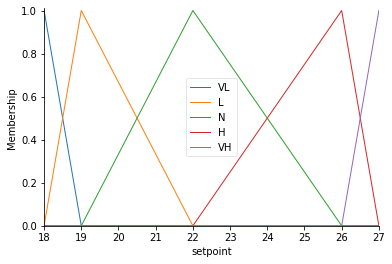

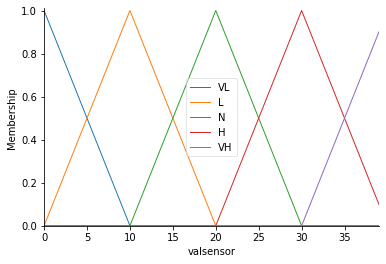

In [ ]:
setpoint=ctrl.Antecedent(np.arange(18,28,1),'setpoint')
valsensor=ctrl.Antecedent(np.arange(0,40,1),'valsensor')
pwm=ctrl.Consequent(np.arange(0,255,1),'pwm')

setpoint['VL']=fuzz.trimf(setpoint.universe,[18 ,18 , 19 ]) 
setpoint['L']=fuzz.trimf(setpoint.universe,[18 ,19 , 22 ])
setpoint['N']=fuzz.trimf(setpoint.universe,[19 ,22 , 26 ])
setpoint['H']=fuzz.trimf(setpoint.universe,[22 ,26 , 27 ])
setpoint['VH']=fuzz.trimf(setpoint.universe,[26 ,27 , 27 ])

valsensor['VL']=fuzz.trimf(valsensor.universe,[0 ,0 , 10 ])
valsensor['L']=fuzz.trimf(valsensor.universe,[0 ,10 , 20 ])
valsensor['N']=fuzz.trimf(valsensor.universe,[10 ,20 , 30 ])
valsensor['H']=fuzz.trimf(valsensor.universe,[20 ,30 , 40 ])
valsensor['VH']=fuzz.trimf(valsensor.universe,[30 ,40 , 40 ])

pwm['VL']=fuzz.trimf(pwm.universe,[0 ,20 , 30 ])
pwm['L']=fuzz.trimf(pwm.universe,[10 ,20 , 30 ])
pwm['N']=fuzz.trimf(pwm.universe,[10 ,20 , 30 ])
pwm['H']=fuzz.trimf(pwm.universe,[10 ,20 , 30 ])
pwm['VH']=fuzz.trimf(pwm.universe,[10 ,20 , 30 ])


setpoint.view()
valsensor.view()

Mobile Robot
- goc 
- vantoc


cam bien sieu am 
- lazer
- lidar
vd : input 3 cam bien = 3 input

ValueError: ignored

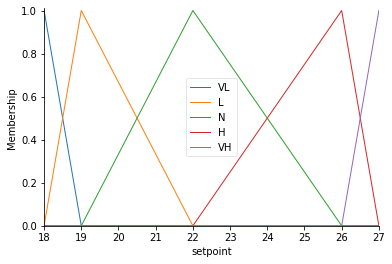

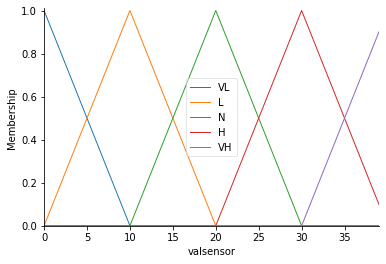

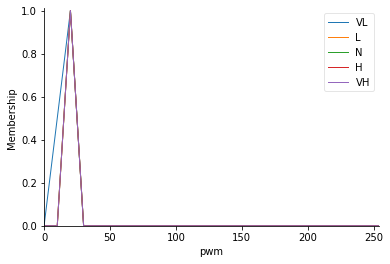

In [10]:
rule1 = ctrl.Rule(setpoint['VL']&valsensor['VL'],pwm['VL'])
rule2 = ctrl.Rule(setpoint['VL']&valsensor['L'],pwm['VL'])
rule3 = ctrl.Rule(setpoint['VL']&valsensor['N'],pwm['L'])
rule4 = ctrl.Rule(setpoint['VL']&valsensor['H'],pwm['L'])
rule5 = ctrl.Rule(setpoint['VL']&valsensor['VH'],pwm['L'])

rule6 = ctrl.Rule(setpoint['L']&valsensor['VL'],pwm['VL'])
rule7 = ctrl.Rule(setpoint['L']&valsensor['L'],pwm['VL'])
rule8 = ctrl.Rule(setpoint['L']&valsensor['N'],pwm['L'])
rule9 = ctrl.Rule(setpoint['L']&valsensor['H'],pwm['N'])
rule10 = ctrl.Rule(setpoint['L']&valsensor['VH'],pwm['N'])

rule11 = ctrl.Rule(setpoint['N']&valsensor['VL'],pwm['L'])
rule12 = ctrl.Rule(setpoint['N']&valsensor['L'],pwm['L'])
rule13 = ctrl.Rule(setpoint['N']&valsensor['N'],pwm['N'])
rule14 = ctrl.Rule(setpoint['N']&valsensor['H'],pwm['H'])
rule15 = ctrl.Rule(setpoint['N']&valsensor['VH'],pwm['H'])

rule16 = ctrl.Rule(setpoint['H']&valsensor['VL'],pwm['L'])
rule17 = ctrl.Rule(setpoint['H']&valsensor['L'],pwm['N'])
rule18 = ctrl.Rule(setpoint['H']&valsensor['N'],pwm['H'])
rule19 = ctrl.Rule(setpoint['H']&valsensor['H'],pwm['VH'])
rule20 = ctrl.Rule(setpoint['H']&valsensor['VH'],pwm['VH'])

rule21 = ctrl.Rule(setpoint['VH']&valsensor['VL'],pwm['L'])
rule22 = ctrl.Rule(setpoint['VH']&valsensor['L'],pwm['N'])
rule23 = ctrl.Rule(setpoint['VH']&valsensor['N'],pwm['H'])
rule24 = ctrl.Rule(setpoint['VH']&valsensor['H'],pwm['VH'])
rule25 = ctrl.Rule(setpoint['VH']&valsensor['VH'],pwm['VH'])
setpoint.view()
valsensor.view()
pwm.view()



In [ ]:
pwming_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
pwming = ctrl.ControlSystemSimulation(pwming_ctrl)
pwming.input['Setpoint'] = 26
pwming.input['Valsensor'] = 34
pwming.compute()
print(pwming.output['pwm'])
pwm.view(sim=pwming)
